##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
%pip install pandas
%pip install pyarrow
%pip install numpy
%pip install scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install xgboost
%pip install torch
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [4]:
# Can have as many cells as you want for code
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

## Data Processing and KNN Imputation

In [5]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [6]:
#importing data into dataframe
df = pd.read_parquet("./data/catB_train.parquet")

# Convert target col to 0 or 1
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Create a mask of non-NA values
non_na_mask = numeric_cols.notna()

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

#KNN imputation on non-NA values
imputed_non_na = imputer.fit_transform(numeric_cols[non_na_mask])
imputed_df = pd.DataFrame(imputed_non_na, columns=numeric_cols.columns, index=numeric_cols.index)

# Replace NA values with imputed values from nearest non-NA neighbors
for col in numeric_cols.columns:
    df[col].fillna(imputed_df[col], inplace=True)


# Display DataFrame after imputation
#print(df)

# Drop non-numeric cols
non_numeric_cols = df.select_dtypes(include=["string", "object"]).columns
df = df.drop(columns=non_numeric_cols)

y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

In [7]:
df.head()

,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,...,hlthclaim_cnt_success,recency_hlthclaim_success,hlthclaim_cnt_unsuccess,recency_hlthclaim_unsuccess,flg_hlthclaim_839f8a_ever,recency_hlthclaim_839f8a,flg_hlthclaim_14cb37_ever,recency_hlthclaim_14cb37,recency_giclaim,f_purchase_lh
19550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,29.666667,2.000000,29.333333,1.0,19.666667,1.0,29.333333,67.333333,0.0
4600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,45.000000,1.666667,49.333333,1.0,59.666667,1.0,49.333333,50.333333,0.0
13337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,58.000000,2.333333,47.666667,1.0,59.666667,1.0,47.666667,56.000000,0.0
15074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,59.000000,1.000000,36.000000,1.0,17.000000,1.0,50.333333,14.666667,0.0
19724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,64.333333,1.333333,74.666667,1.0,49.666667,1.0,64.333333,30.333333,0.0


In [8]:
df.shape

(17992, 90)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17992 entries, 19550 to 15795
Data columns (total 90 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   flg_substandard                    17992 non-null  float64
 1   flg_is_borderline_standard         17992 non-null  float64
 2   flg_is_revised_term                17992 non-null  float64
 3   flg_is_rental_flat                 17992 non-null  float64
 4   flg_has_health_claim               17992 non-null  float64
 5   flg_has_life_claim                 17992 non-null  float64
 6   flg_gi_claim                       17992 non-null  float64
 7   flg_is_proposal                    17992 non-null  float64
 8   flg_with_preauthorisation          17992 non-null  float64
 9   flg_is_returned_mail               17992 non-null  float64
 10  is_consent_to_mail                 17992 non-null  float64
 11  is_consent_to_email                17992 non-null  floa

<Axes: ylabel='Frequency'>

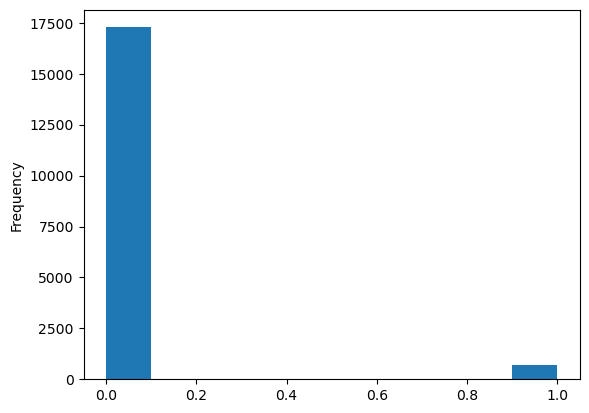

In [14]:
#Extreme inbalanced dataset 
df['f_purchase_lh'].plot.hist()

In [10]:
df.isna().sum()

flg_substandard               0
flg_is_borderline_standard    0
flg_is_revised_term           0
flg_is_rental_flat            0
flg_has_health_claim          0
                             ..
recency_hlthclaim_839f8a      0
flg_hlthclaim_14cb37_ever     0
recency_hlthclaim_14cb37      0
recency_giclaim               0
f_purchase_lh                 0
Length: 90, dtype: int64

### Scatterplots

In [17]:
# Split the DataFrame into two separate DataFrames based on the label values
#df_label_0 = df[df['f_purchase_lh'] == 0]
#df_label_1 = df[df['f_purchase_lh'] == 1]

# Create a scatter plot for each feature
#for feature in df.columns[:-1]: 
    #plt.figure(figsize=(8, 6))
    #plt.scatter(df_label_0[feature], df_label_0['f_purchase_lh'], label='Label 0', color='blue', marker='o')
    #plt.scatter(df_label_1[feature], df_label_1['f_purchase_lh'], label='Label 1', color='red', marker='x')
    #plt.xlabel(feature)
    #plt.ylabel('Label')
    #plt.title(f'Scatter Plot of {feature} vs Label')
    #plt.legend()
    #plt.show()

# Failure of scatterplots

We observe that scatter plots do not work well for our dataset. This can be explained by the following reasons

1. Most of our variables are qualitative variables.  

2. There are only 2 binary classes, which will only be represented by two points. 


## SMOTE to balance the dataset
### If you encounter ImportError, please run the following commands in the next 2 cells
#### This is a bug with the newest version of the packages and we solve it by downgrading them to earlier version

In [1]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [2]:
!pip install scikit-learn==1.2.2
!pip install imblearn

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size = 0.20, random_state = 42)

from imblearn.over_sampling import RandomOverSampler

def balancing(X,y,type):
       '''
       This function helps us to choose the type of resampling that we 
       want to do, functional abstraction, 1010 things :-)
       '''
       ros = RandomOverSampler(random_state=42)
       smote = SMOTE(random_state=42)
       if type == 'oversample':
              return ros.fit_resample(X, y)
       else:
              return smote.fit_resample(X,y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Balance the training data 
X_train , y_train = balancing(X_train , y_train, 'smote')

## Models

### Importance Plot

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  


def cross_validate(model , X , y):
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    # Perform cross-validation and get the accuracy scores for each fold
    cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    # Print the accuracy scores for each fold
    print("Cross-validation scores:", cross_val_scores)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Training Accuracy: 1.00
Cross-validation scores: [0.97759306 0.98156849 0.97994218 0.98391469 0.98011928]
Accuracy: 0.9510975270908586
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3448
         1.0       0.24      0.08      0.12       151

    accuracy                           0.95      3599
   macro avg       0.60      0.53      0.55      3599
weighted avg       0.93      0.95      0.94      3599



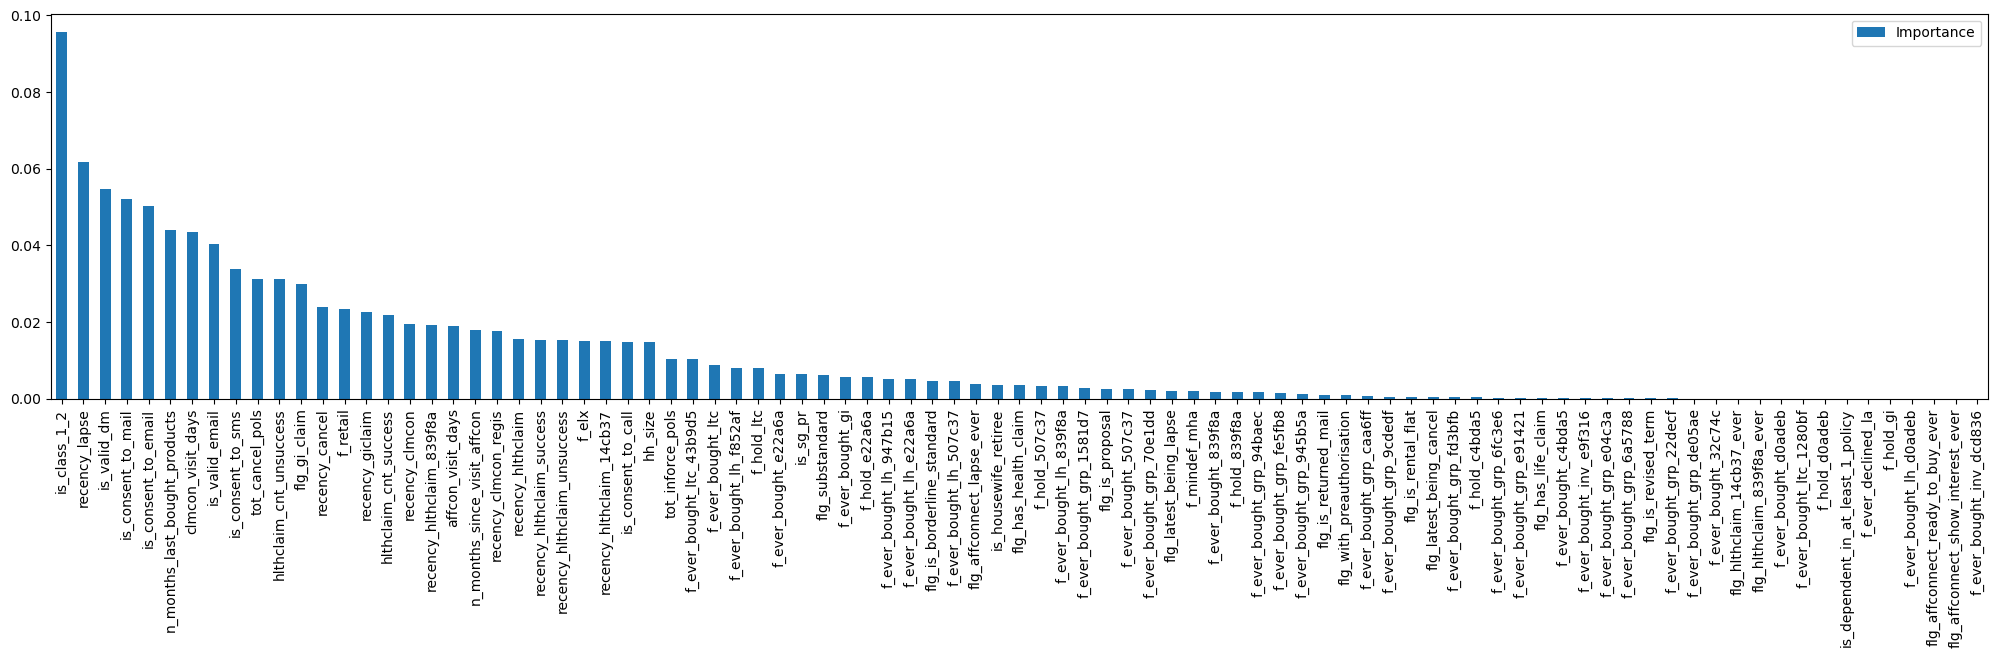

In [23]:
def randomforest(X_train , y_train , X_test, y_test):
    """
    Abstracted function for using a random forest classifer
    Inputs: X,y for test and train 
    Output: Prints accuracy and importance plots 
    Returns: N/A
    """
    clf = RandomForestClassifier(n_estimators=100, bootstrap= True)

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Predict labels on training data 
    y_train_pred = clf.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(clf, X_train , y_train)
    
    # Predict labels on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

    # Importance plot 

    feat_importances = pd.DataFrame(clf.feature_importances_, index= X_train.columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar', figsize=(25,5))


randomforest(X_train, y_train, X_test, y_test)

## XGBoost Tree

In [27]:
import xgboost as xgb

Training Accuracy: 1.00
Cross-validation scores: [0.98156849 0.98247199 0.97958077 0.98283029 0.98210736]
Accuracy: 0.9558210614059461
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      3448
         1.0       0.41      0.12      0.18       151

    accuracy                           0.96      3599
   macro avg       0.69      0.56      0.58      3599
weighted avg       0.94      0.96      0.94      3599



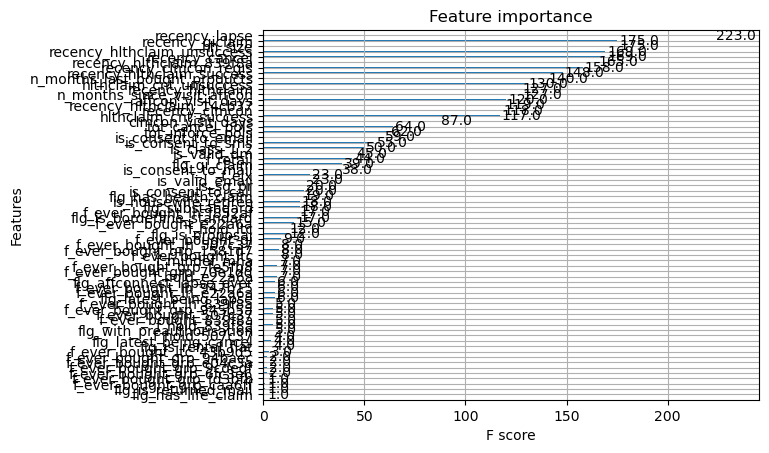

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Hanrui\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2023.11.17 |       h56e8100_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    py-xgboost-1.7.3           |  py311haa95532_0         274 KB
    xgboost-1.7.3              |  py311haa95532_0          13 KB
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         pkgs/



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [28]:
def xgbmodel(X_train , y_train , X_test, y_test):
    """
    Abstracted function for using gradient boosting
    Inputs: X,y for test and train 
    Output: Prints accuracy and importance plots 
    Returns: N/A
    """
    # specify parameters via map
    xgb_model = xgb.XGBClassifier()

    # Fit the model 
    xgb_model.fit(X_train,y_train)

    # Predict labels on training data 
    y_train_pred = xgb_model.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(xgb_model, X_train , y_train)

    # Make Prediction 
    y_pred = xgb_model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

    xgb.plot_importance(xgb_model)


xgbmodel(X_train , y_train, X_test, y_test)

## Feature Selection
### We select most important 7 features base on the importance plots

Training Accuracy: 1.00
Cross-validation scores: [0.95785094 0.96255427 0.96183068 0.96617221 0.96201158]
Accuracy: 0.9349819394276188
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3462
         1.0       0.15      0.15      0.15       137

    accuracy                           0.93      3599
   macro avg       0.56      0.56      0.56      3599
weighted avg       0.94      0.93      0.94      3599



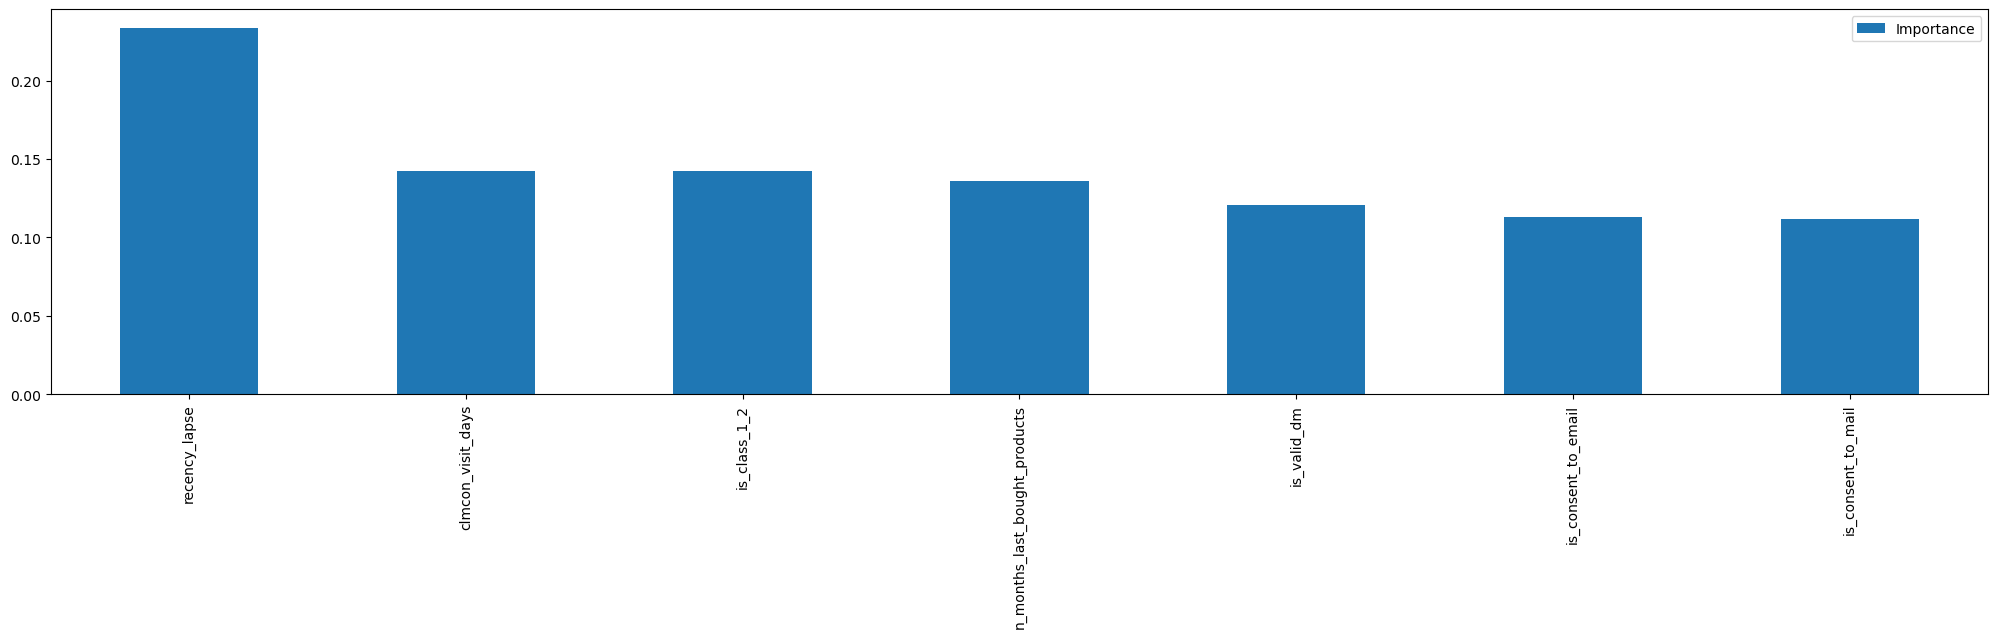

In [29]:
# Choosing the subset based on our above observations
subset = ['is_class_1_2', 'recency_lapse','is_valid_dm', 'is_consent_to_mail','is_consent_to_email','n_months_last_bought_products','clmcon_visit_days']

# Define the subset
X_subset = df[subset]

# Train test split for the subset
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size = 0.2)

# Balancing for trainset 
X_train_subset, y_train_subset = balancing(X_train_subset, y_train_subset, 'smote')

randomforest(X_train_subset, y_train_subset, X_test_subset, y_test_subset)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
def logisticmodel(X_train, y_train, X_test, y_test):
    logistic = LogisticRegression()

    # Fit the model on the training data
    logistic.fit(X_train, y_train)

    # Predict labels on training data 
    y_train_pred = logistic.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(logistic, X_train , y_train)

    # Predict labels on the test data
    y_pred = logistic.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

logisticmodel(X_train, y_train, X_test, y_test)

c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.79


c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross-validation scores: [0.79382002 0.78153235 0.78695338 0.78818001 0.78799928]
Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86      3448
         1.0       0.09      0.54      0.16       151

    accuracy                           0.76      3599
   macro avg       0.53      0.66      0.51      3599
weighted avg       0.94      0.76      0.83      3599



c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# with feature selection
#logisticmodel(X_train_subset,y_train_subset,X_test_subset,y_test_subset)

### Feature selection using L1 Penalty (LASSO)

In [33]:
def PenalisedClassification(X_train, y_train, X_test, y_test):
    logistic = LogisticRegression(penalty = 'l1', solver= 'saga')

    # Fit the model on the training data
    logistic.fit(X_train, y_train)

    # Predict labels on training data 
    y_train_pred = logistic.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(logistic, X_train , y_train)

    # Predict labels on the test data
    y_pred = logistic.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

In [34]:
PenalisedClassification(X_train , y_train , X_test, y_test)

c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Accuracy: 0.74


c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-validation scores: [0.73834478 0.73075533 0.72677991 0.73504428 0.72275438]
Accuracy: 0.71
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      3448
         1.0       0.09      0.64      0.16       151

    accuracy                           0.71      3599
   macro avg       0.53      0.68      0.49      3599
weighted avg       0.94      0.71      0.80      3599



c:\Users\Hanrui\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### emsemble method that uses XGBoost and Random Forests 

Training Accuracy: 0.92
Cross-validation scores: [0.90856523 0.91452837 0.91814239 0.90999458 0.91686246]
Accuracy: 0.88
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      3448
         1.0       0.17      0.46      0.25       151

    accuracy                           0.88      3599
   macro avg       0.57      0.68      0.59      3599
weighted avg       0.94      0.88      0.91      3599



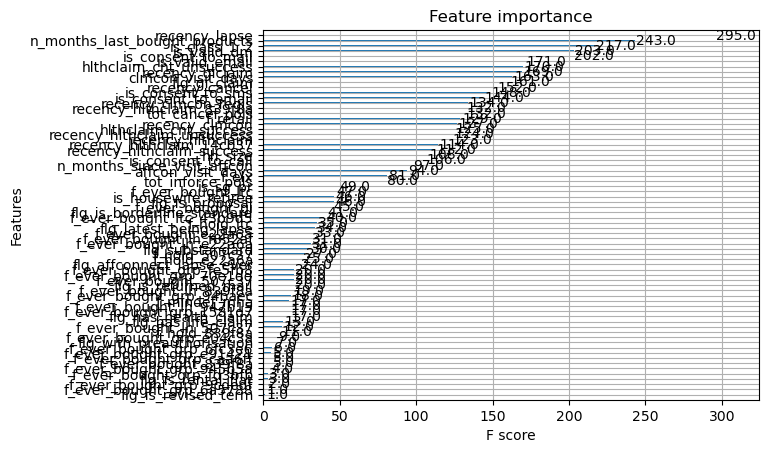

In [35]:
from xgboost import XGBRFClassifier

def xgboostedrf(X_train ,y_train , X_test, y_test):

    # Load the models
    model = XGBRFClassifier()

    model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)

    model.fit(X_train , y_train)

    # Predict labels on training data 
    y_train_pred = model.predict(X_train)

    # Accuracy of the training data 
    training_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {training_accuracy:.2f}')

    # Cross Validation Score
    cross_validate(model, X_train , y_train)

    # Predict labels on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Print a classification report
    report = classification_report(y_test, y_pred)
    print(report)

    xgb.plot_importance(model)
    

xgboostedrf(X_train, y_train , X_test, y_test)

In [40]:
#xgboostedrf(X_train_subset, y_train_subset , X_test, y_test)

### Multilayer Perceptron 

In [42]:

import torch 
from torch import nn 
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [43]:
# Convert our datatypes to PyTorch Tensors 
X_train_tensor = torch.tensor(X_train.values).type(torch.float32)
y_train_tensor = torch.tensor(y_train.values).type(torch.float32)
X_test_tensor = torch.tensor(X_test.values).type(torch.float32)
y_test_tensor = torch.tensor(y_test.values).type(torch.float32)

# Create PyTorch Dataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 256

# Create DataLoader objects for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Initialised for later 
INPUT_SIZE  = X_train_tensor.shape[1]

In [44]:
# Build the MLP

class MLPClassifier(nn.Module):
    def __init__(self, input_features, hidden_units):
        super().__init__()
        self.layer_stacks = nn.Sequential(
            nn.Linear(in_features=input_features, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= 1)
        )

    def forward(self, x):
        return self.layer_stacks(x)
    
MLP = MLPClassifier(INPUT_SIZE, 256)

In [45]:
# Loss function 
loss_fn = nn.BCEWithLogitsLoss()
# Optimiser 
optimizer = torch.optim.SGD(params = MLP.parameters(), lr = 1e-2)
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


# Training and Evaluation Loop

epochs = 100

for epoch in range(epochs):
    MLP.train()
    for batch_X, batch_y in train_loader:
      # Zero grad 
      optimizer.zero_grad()

      # Forward pass 
      y_logits = MLP(batch_X).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits))

      # Loss calculation 
      loss = loss_fn(y_logits, batch_y)

      acc = accuracy_fn(y_pred, batch_y)

      # Backpropagate
      loss.backward()

      # Update Params
      optimizer.step()

    # Evaluation 
    MLP.eval()
    with torch.inference_mode():
       test_logits = MLP(X_test_tensor).squeeze()
       test_pred = torch.round(torch.sigmoid(test_logits))

       # Test Loss
       test_loss = loss_fn(test_logits, y_test_tensor)
       test_accuracy = accuracy_fn(y_test_tensor, test_pred)

    if epoch % 10 == 0 : 
       print(f'Epoch: {epoch} | Training Loss: {loss} | Training Accuracy : {acc} | Test Loss : {test_loss} | Test Accuracy: {test_accuracy}')


Epoch: 0 | Training Loss: 0.7203527688980103 | Training Accuracy : 55.00000000000001 | Test Loss : 0.6622214913368225 | Test Accuracy: 63.712142261739366
Epoch: 10 | Training Loss: 0.5131469964981079 | Training Accuracy : 70.0 | Test Loss : 0.31255924701690674 | Test Accuracy: 91.85884968046679
Epoch: 20 | Training Loss: 0.4386988580226898 | Training Accuracy : 80.0 | Test Loss : 0.7051342725753784 | Test Accuracy: 65.90719644345651
Epoch: 30 | Training Loss: 0.26688292622566223 | Training Accuracy : 95.0 | Test Loss : 0.2682570517063141 | Test Accuracy: 90.60850236176717
Epoch: 40 | Training Loss: 0.4026290774345398 | Training Accuracy : 85.0 | Test Loss : 0.49568378925323486 | Test Accuracy: 77.4659627674354
Epoch: 50 | Training Loss: 0.3324512839317322 | Training Accuracy : 85.0 | Test Loss : 0.25455716252326965 | Test Accuracy: 92.30341761600445
Epoch: 60 | Training Loss: 0.15407077968120575 | Training Accuracy : 100.0 | Test Loss : 0.6277092099189758 | Test Accuracy: 72.0200055570

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [3]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!